In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df=pd.read_csv("C:\\Users\\User\\Downloads\\Big_data\\Reviews.csv\\Reviews.csv")

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
# Check for missing values
print(df.isnull().sum())


Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [5]:
# Drop rows with missing values in the 'Text' or 'Score' columns
df = df.dropna(subset=['Text', 'Score'])

In [6]:
# Ensure 'Score' is an integer
df['Score'] = df['Score'].astype(int)

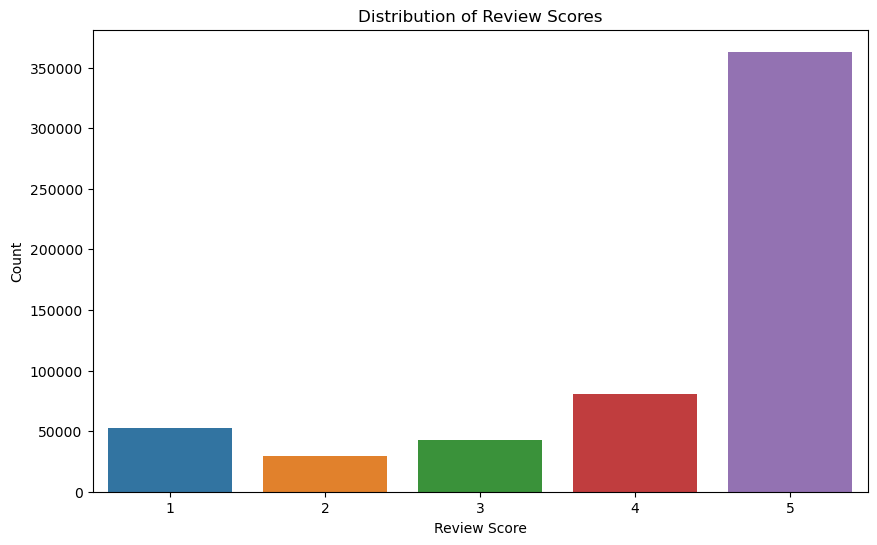

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of scores
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', data=df)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()


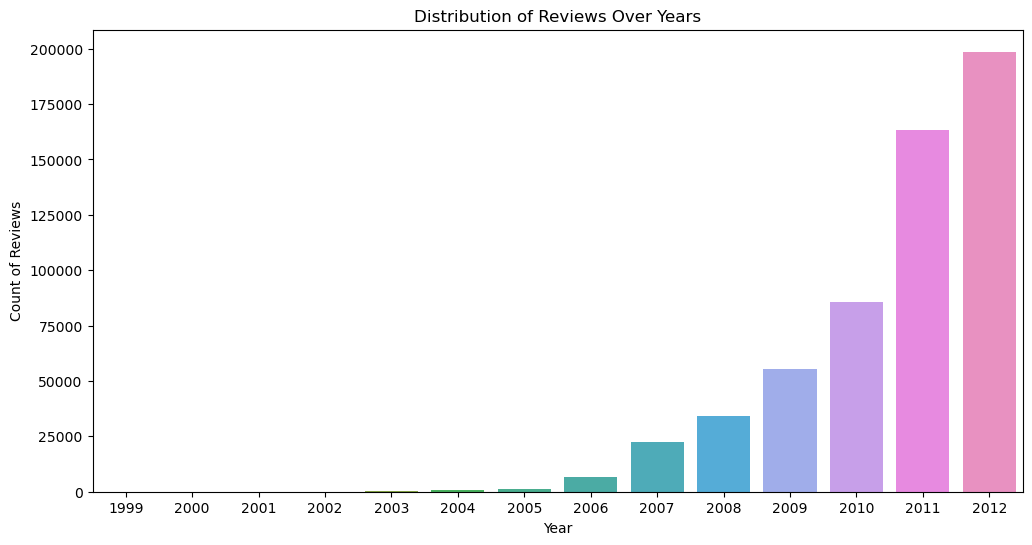

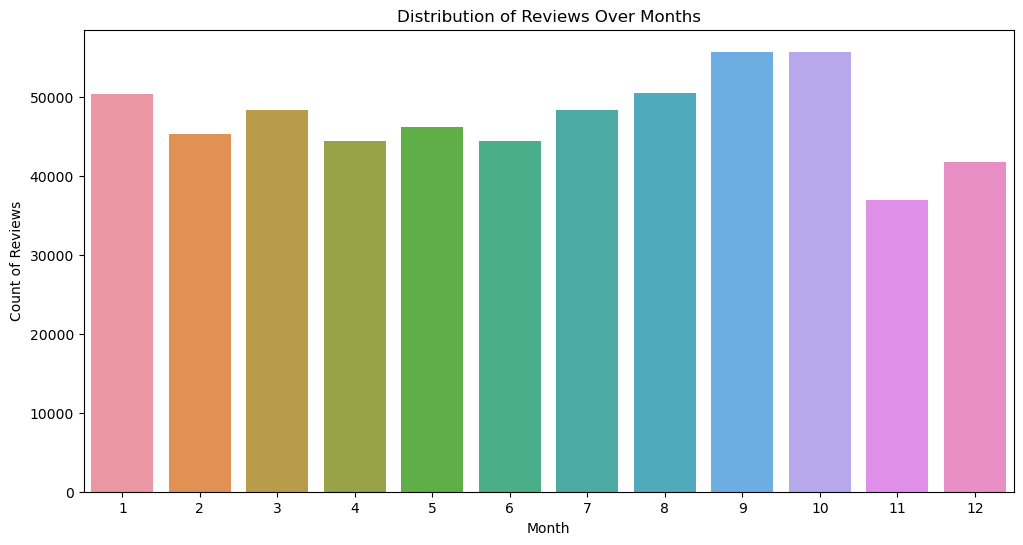

In [8]:
# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Extract date features
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month

# Plot time series analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df)
plt.title('Distribution of Reviews Over Years')
plt.xlabel('Year')
plt.ylabel('Count of Reviews')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df)
plt.title('Distribution of Reviews Over Months')
plt.xlabel('Month')
plt.ylabel('Count of Reviews')
plt.show()


In [9]:
import nltk

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function for text cleaning
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Function for sentiment labeling
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

# Labeling sentiments
df['Sentiment'] = df['Score'].apply(label_sentiment)

# Apply text cleaning
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Display the first few rows to verify
display(df[['Id', 'Text', 'Cleaned_Text', 'Score', 'Sentiment']].head())

,Id,Text,Cleaned_Text,Score,Sentiment
0,1,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,5,positive
1,2,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...,1,negative
2,3,This is a confection that has been around a fe...,confection around century light pillowy citrus...,4,positive
3,4,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,2,negative
4,5,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,5,positive


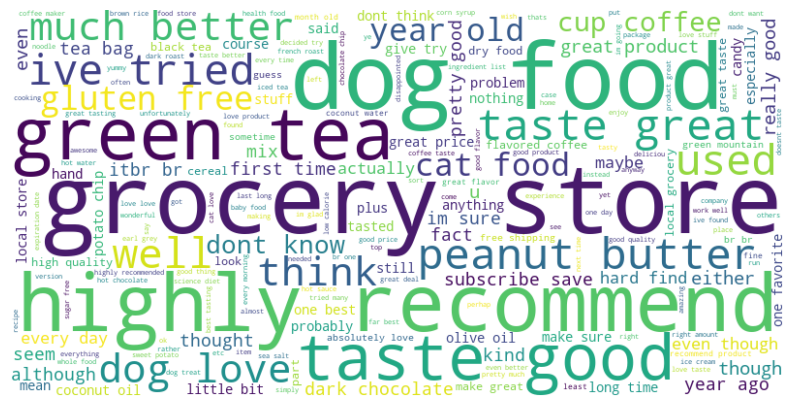

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into a single string
corpus = ' '.join(df['Cleaned_Text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Split the data
X = df['Cleaned_Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, transform the testing data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Model Training
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Model Evaluation
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8168192732934005
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.26      0.40     16181
     neutral       0.44      0.00      0.00      8485
    positive       0.82      1.00      0.90     89025

    accuracy                           0.82    113691
   macro avg       0.70      0.42      0.43    113691
weighted avg       0.79      0.82      0.76    113691



In [15]:

# Create a dataframe for y_test and y_pred along with the respective Id
results_df = pd.DataFrame({'Id': df.loc[X_test.index, 'Id'], 'y_test': y_test, 'y_pred': y_pred})

# Display the dataframe
display(results_df.head(4))


,Id,y_test,y_pred
165256,165257,positive,positive
231465,231466,positive,positive
427827,427828,neutral,positive
433954,433955,negative,positive


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Initialize Random Forest classifier with TF-IDF Vectorizer
rf_clf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Model Training
rf_clf.fit(X_train, y_train)

# Model Evaluation
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.8946442550421757
Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.61      0.73     16181
     neutral       0.98      0.39      0.55      8485
    positive       0.89      0.99      0.94     89025

    accuracy                           0.89    113691
   macro avg       0.93      0.66      0.74    113691
weighted avg       0.90      0.89      0.88    113691

